In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [2]:
class AnomalyDetection:
    def __init__(self, contamination=0.15, random_state=42):
        self.contamination = contamination
        self.random_state = random_state
        self.encoder = LabelEncoder()
        self.isolation_forest = IsolationForest(contamination=self.contamination, random_state=self.random_state)
    
    def preprocess_data(self):
        # Encoding categorical columns
        self.df['Payment Type'] = self.encoder.fit_transform(self.df['Payment Type'])
        self.df['Category'] = self.encoder.fit_transform(self.df['Category'])
    
    def detect_anomalies(self):
        self.df["Amount"] = self.df["Amount (INR)"]
        # Selecting numerical columns for anomaly detection
        features = ['Category', 'Amount']
        self.df['Anomaly'] = self.isolation_forest.fit_predict(self.df[features])
    
    def visualize_anomalies(self):
        # Scatter plot to visualize anomalies
        plt.figure(figsize=(12, 6))

        # Plot normal points
        normal = self.df[self.df['Anomaly'] == 1]
        plt.scatter(normal['Amount'], normal['Category'], color='blue', label='Normal', alpha=0.6)

        # Plot anomalies
        anomalies = self.df[self.df['Anomaly'] == -1]
        plt.scatter(anomalies['Amount'], anomalies['Category'], color='red', label='Anomaly', alpha=0.8)

        # Adding labels and title
        plt.xlabel('Amount', fontsize=12)
        plt.ylabel('Category', fontsize=12)
        plt.title('Isolation Forest - Anomalies Detection', fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

    def save_model(self, file_path):
        with open(file_path, "wb") as file:
            pickle.dump(self, file)
        print(f"Model saved to {file_path}")
    
    def run(self, df):  # Updated to accept df as argument
        self.df = df
        self.preprocess_data()
        self.detect_anomalies()
        self.visualize_anomalies()


C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


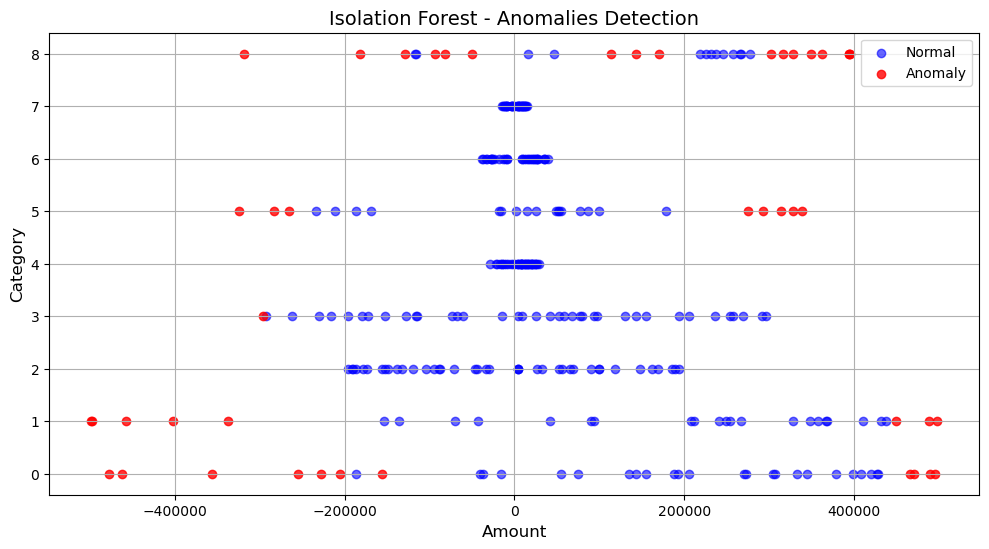

In [3]:
model = pd.read_csv("lun.csv")
anomaly_detection = AnomalyDetection()
anomaly_detection.run(model)

# Save the object to a pickle file
with open('an.pkl', 'wb') as file:
    pickle.dump(anomaly_detection, file) 

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


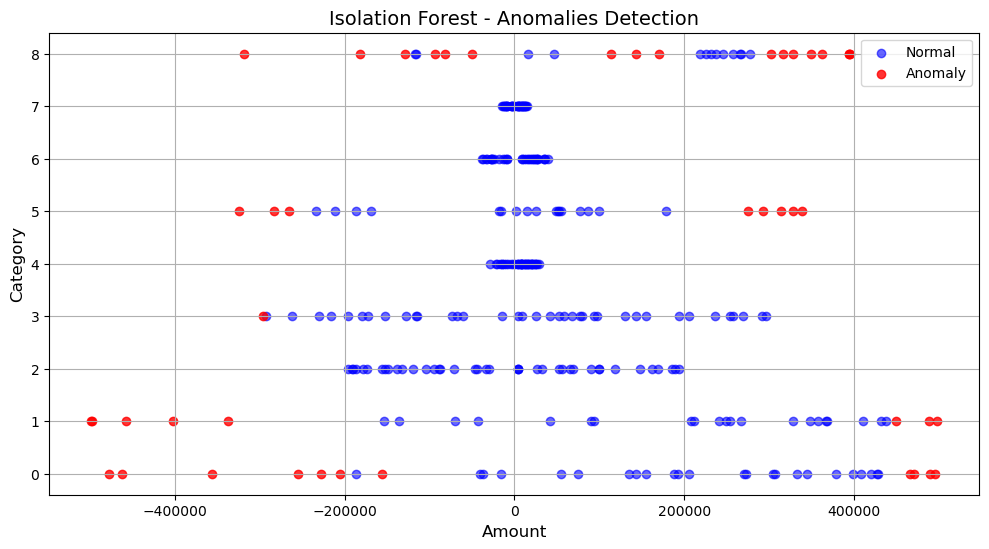

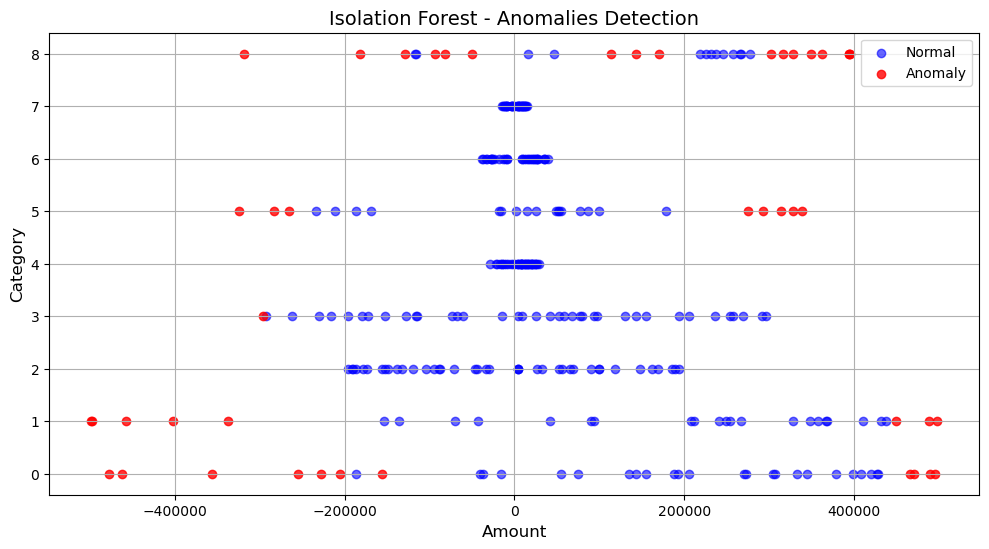

In [5]:

# Load the updated model
with open("an.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Load new user data

# Replace with your new dataset file
new_data = pd.read_csv("lun.csv")

# Process the new data
loaded_model.run(new_data)  # This should work now without error

# Optionally visualize anomalies
loaded_model.visualize_anomalies()